In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:01<00:00, 149MB/s]
100% 163M/163M [00:01<00:00, 149MB/s]


In [3]:
!unzip /content/face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [2]:

masked_files = os.listdir("/content/data/with_mask")
not_masked_files = os.listdir("/content/data/without_mask")


In [3]:
print(len(masked_files))
print(len(not_masked_files))

3725
3828


In [4]:
label_masked = [1]*len(masked_files)
label_not_masked = [0]*len(not_masked_files)

In [5]:
label = label_masked+label_not_masked

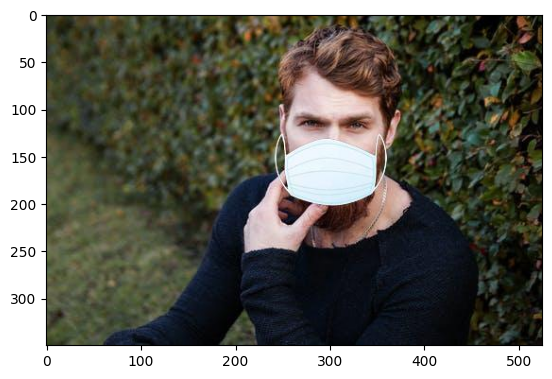

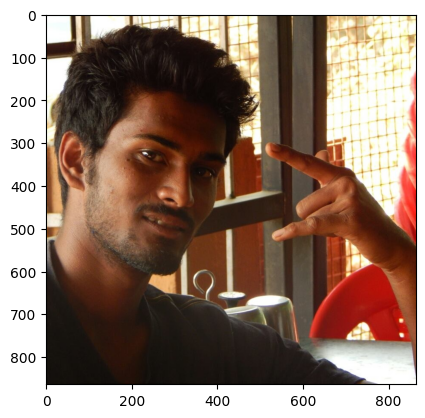

In [6]:
# displaying_masked_images

img = plt.imread("/content/data/with_mask/with_mask_1.jpg")
imgplot = plt.imshow(img)
plt.show()

#Displaying Unmasked Images

img = plt.imread("/content/data/without_mask/without_mask_1044.jpg")
imgplot = plt.imshow(img)
plt.show()

**Image Preprocessing**

In [7]:
data = []

for image in masked_files:
  img = Image.open("/content/data/with_mask/"+image)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  data.append(img)

for image in not_masked_files:
  img = Image.open("/content/data/without_mask/"+image)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  data.append(img)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
print(len(data))

7553


In [9]:
print(type(data))

<class 'list'>


In [10]:
X = np.array(data)
y = np.array(label)

In [11]:
X.shape

(7553, 128, 128, 3)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.2)

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [14]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid",input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(2,activation = "softmax"))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
record = model.fit(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

Epoch 1/5
189/189 [==============================] - 13s 34ms/step - loss: 0.3678 - accuracy: 0.8292 - val_loss: 0.2376 - val_accuracy: 0.9073
Epoch 2/5
189/189 [==============================] - 5s 26ms/step - loss: 0.2368 - accuracy: 0.9126 - val_loss: 0.1936 - val_accuracy: 0.9265
Epoch 3/5
189/189 [==============================] - 4s 24ms/step - loss: 0.1880 - accuracy: 0.9359 - val_loss: 0.1863 - val_accuracy: 0.9252
Epoch 4/5
189/189 [==============================] - 5s 26ms/step - loss: 0.1511 - accuracy: 0.9449 - val_loss: 0.1529 - val_accuracy: 0.9464
Epoch 5/5
189/189 [==============================] - 5s 26ms/step - loss: 0.1319 - accuracy: 0.9525 - val_loss: 0.1517 - val_accuracy: 0.9550


In [18]:
loss ,acc = model.evaluate(X_test_scaled,y_test)

48/48 [==============================] - 0s 10ms/step - loss: 0.1517 - accuracy: 0.9550


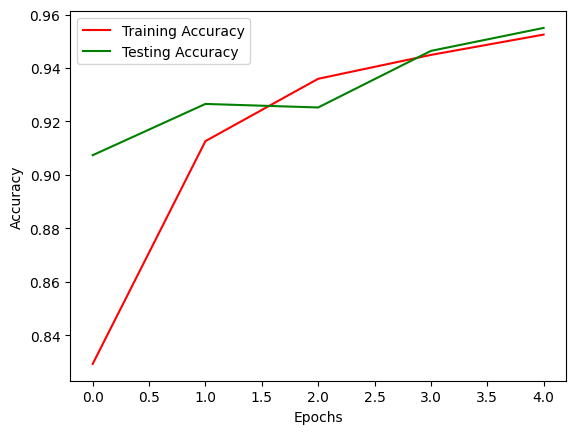

In [19]:
plt.plot(record.history["accuracy"],label="Training Accuracy",color="red")
plt.plot(record.history["val_accuracy"],label="Testing Accuracy",color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

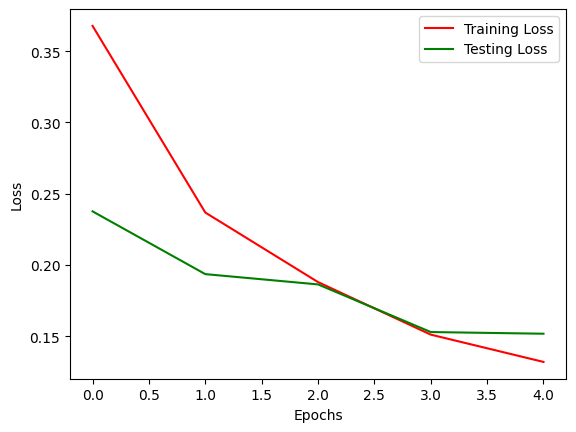

In [20]:
plt.plot(record.history["loss"],label="Training Loss",color="red")
plt.plot(record.history["val_loss"],label="Testing Loss",color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Path of the testing image/content/download.jpg
1/1 [==============================] - 1s 556ms/step
Masked


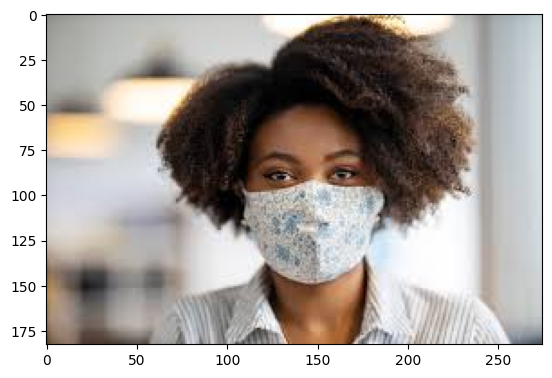

In [21]:
#Testing
import cv2
test_img = Image.open(input("Path of the testing image"))
plt.imshow(test_img)
test_img = test_img.resize((128,128))
test_img = test_img.convert("RGB")
test_img = np.array(test_img)
test_img = test_img/255
test_input = test_img.reshape((1,128,128,3))
output = model.predict(test_input)
if np.argmax(output)==0:
  print("Not Masked")
else:
  print("Masked")

Path of the testing image/content/images.jpg
1/1 [==============================] - 0s 20ms/step
Not Masked


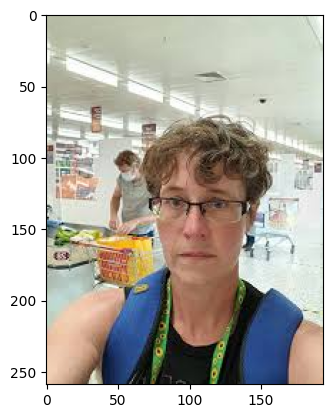

In [22]:
#Testing
import cv2
test_img = Image.open(input("Path of the testing image"))
plt.imshow(test_img)
test_img = test_img.resize((128,128))
test_img = test_img.convert("RGB")
test_img = np.array(test_img)
test_img = test_img/255
test_input = test_img.reshape((1,128,128,3))
output = model.predict(test_input)
if np.argmax(output)==0:
  print("Not Masked")
else:
  print("Masked")